In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

In [3]:
assets = pd.read_csv("g-research-crypto-forecasting/asset_details.csv") 
sup_train = pd.read_csv("g-research-crypto-forecasting/supplemental_train.csv") 
sample = pd.read_csv("g-research-crypto-forecasting/example_sample_submission.csv") 
ex_test = pd.read_csv("g-research-crypto-forecasting/example_test.csv")

assets.shape, sup_train.shape, sample.shape, ex_test.shape

((14, 3), (2015112, 10), (56, 3), (56, 11))

In [4]:
train = pd.read_csv("g-research-crypto-forecasting/train.csv") 
train.shape

(24236806, 10)

In [5]:
train.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [6]:
train['timestamp'].nunique() 

1956782

<AxesSubplot:xlabel='Asset_Name', ylabel='Weight'>

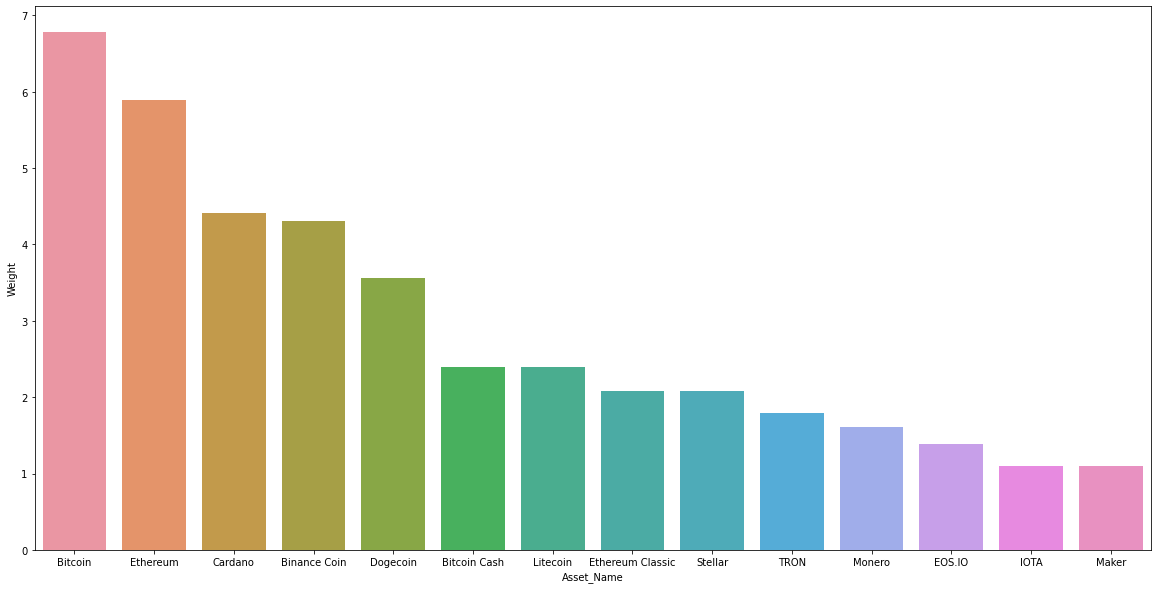

In [7]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Asset_Name', y='Weight', data=assets.sort_values(by=['Weight'],ascending=False))


In [8]:
train[train['timestamp'] == 1514764860] 

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.3025,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.3300,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.0900,329.8800,329.0900,329.460000,6.635710,329.454118,NaN


Check for missing values

In [9]:
train.isnull().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [10]:
df_train = pd.merge(train, assets, how="left", on=["Asset_ID"]) 

df_train.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,2.397895,Bitcoin Cash
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,4.304065,Binance Coin
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,6.779922,Bitcoin
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,1.386294,EOS.IO
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,2.079442,Ethereum Classic


In [12]:
df = df_train.dropna()

<AxesSubplot:xlabel='Asset_Name', ylabel='count'>

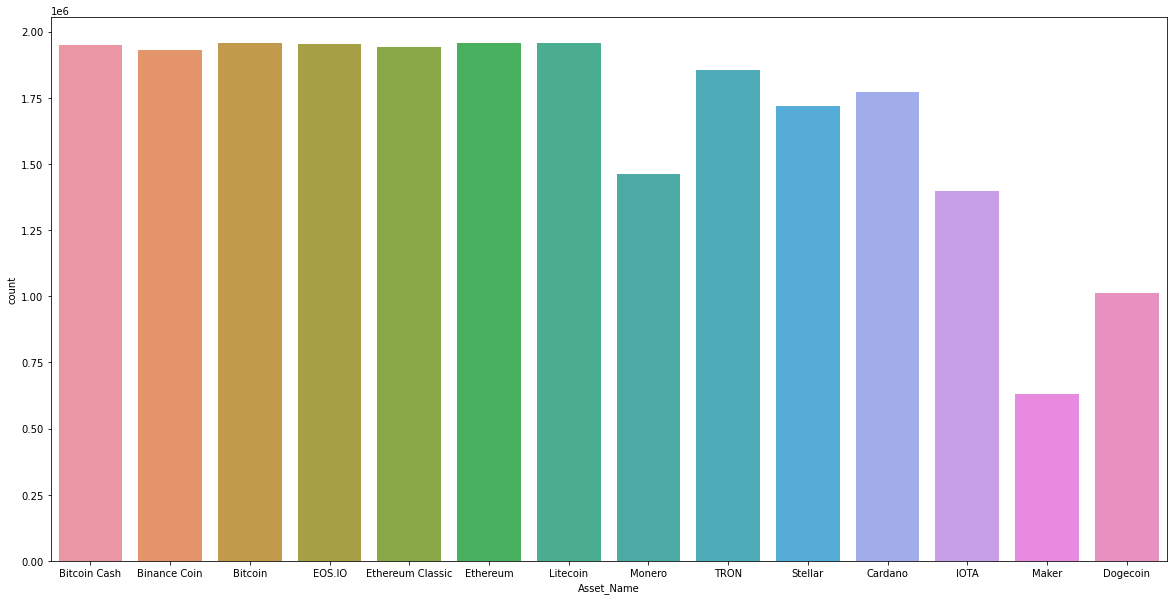

In [13]:
plt.subplots(figsize=(20,10))
sns.countplot(x='Asset_Name', data = df)

In [14]:
df.sample(20)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name
3733280,1537067760,12,9.0,0.201260,0.201410,0.20109,0.201100,18947.600000,0.201231,0.002377,2.079442,Stellar
23909192,1630778100,12,205.0,0.370595,0.370921,0.37010,0.370582,226347.851400,0.370515,0.001093,2.079442,Stellar
19658381,1612555920,2,150.0,434.376000,434.760000,433.89000,434.050000,142.357276,434.172150,-0.001629,2.397895,Bitcoin Cash
6838296,1552928640,7,25.0,4.357850,4.366000,4.35000,4.357350,1312.065698,4.357609,0.000283,2.079442,Ethereum Classic
15984062,1596649500,5,131.0,3.065375,3.069000,3.06240,3.064425,13201.668000,3.065430,-0.001258,1.386294,EOS.IO
1899634,1527425160,9,28.0,117.642500,117.830000,117.37000,117.567500,81.600584,117.610916,0.000732,2.397895,Litecoin
2696880,1531648980,13,15.0,0.034392,0.034401,0.03435,0.034365,523931.380000,0.034385,0.000594,1.791759,TRON
14507414,1589780700,1,1540.0,9862.363750,9879.000000,9847.21000,9865.151250,147.919831,9865.309301,0.001647,6.779922,Bitcoin
5208318,1544661720,7,52.0,3.860750,3.941900,3.82000,3.858250,1662.637073,3.858793,0.003702,2.079442,Ethereum Classic
17097584,1601487300,13,71.0,0.026329,0.026352,0.02630,0.026329,264468.375830,0.026326,-0.001464,1.791759,TRON


<AxesSubplot:>

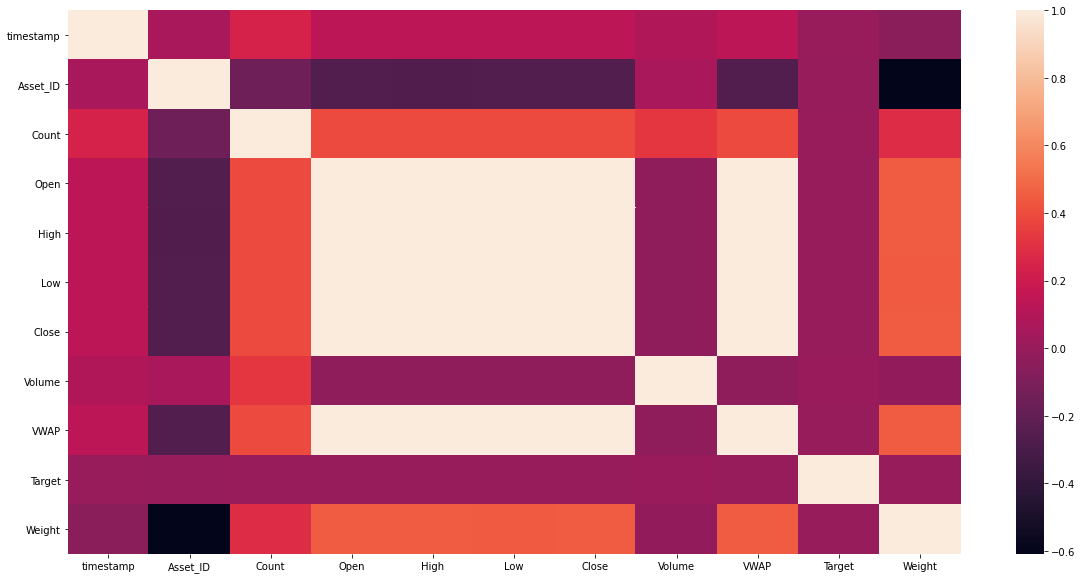

In [15]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr())

In [16]:
def reduce_mem_usage(df,do_categoricals=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            if do_categoricals==True:
                df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))   
    return df

dtrain = reduce_mem_usage(df)


Memory usage of dataframe is 2329.44 MB


<ipython-input-16-01a43509bd20>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.int32)
<ipython-input-16-01a43509bd20>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.int8)
<ipython-input-16-01a43509bd20>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

Memory usage after optimization is: 1097.52 MB
Decreased by 52.9%


In [17]:
dtrain['fulldate'] = pd.to_datetime(dtrain['timestamp'], unit='s')
dtrain['date'] = dtrain['fulldate'].apply(lambda d: d.date())
dtrain['time'] = dtrain['fulldate'].apply(lambda d: d.time())
dtrain.head()

<ipython-input-17-137774d3fe9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrain['fulldate'] = pd.to_datetime(dtrain['timestamp'], unit='s')
<ipython-input-17-137774d3fe9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrain['date'] = dtrain['fulldate'].apply(lambda d: d.date())
<ipython-input-17-137774d3fe9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name,fulldate,date,time
0,1514764860,2,40.0,2376.000000,2400.000000,2358.00000,2374.00000,19.233006,2373.116392,-0.004219,2.398438,Bitcoin Cash,2018-01-01 00:01:00,2018-01-01,00:01:00
1,1514764860,0,5.0,8.531250,8.531250,8.53125,8.53125,78.379997,8.530000,-0.014397,4.304688,Binance Coin,2018-01-01 00:01:00,2018-01-01,00:01:00
2,1514764860,1,229.0,13832.000000,14016.000000,13664.00000,13848.00000,31.550062,13827.062093,-0.014641,6.781250,Bitcoin,2018-01-01 00:01:00,2018-01-01,00:01:00
3,1514764860,5,32.0,7.660156,7.660156,7.65625,7.65625,6626.713379,7.657713,-0.013924,1.386719,EOS.IO,2018-01-01 00:01:00,2018-01-01,00:01:00
4,1514764860,7,5.0,25.921875,25.921875,25.87500,25.87500,121.087311,25.891363,-0.008263,2.080078,Ethereum Classic,2018-01-01 00:01:00,2018-01-01,00:01:00


In [18]:
dtrain_sample = dtrain.sample(10000)

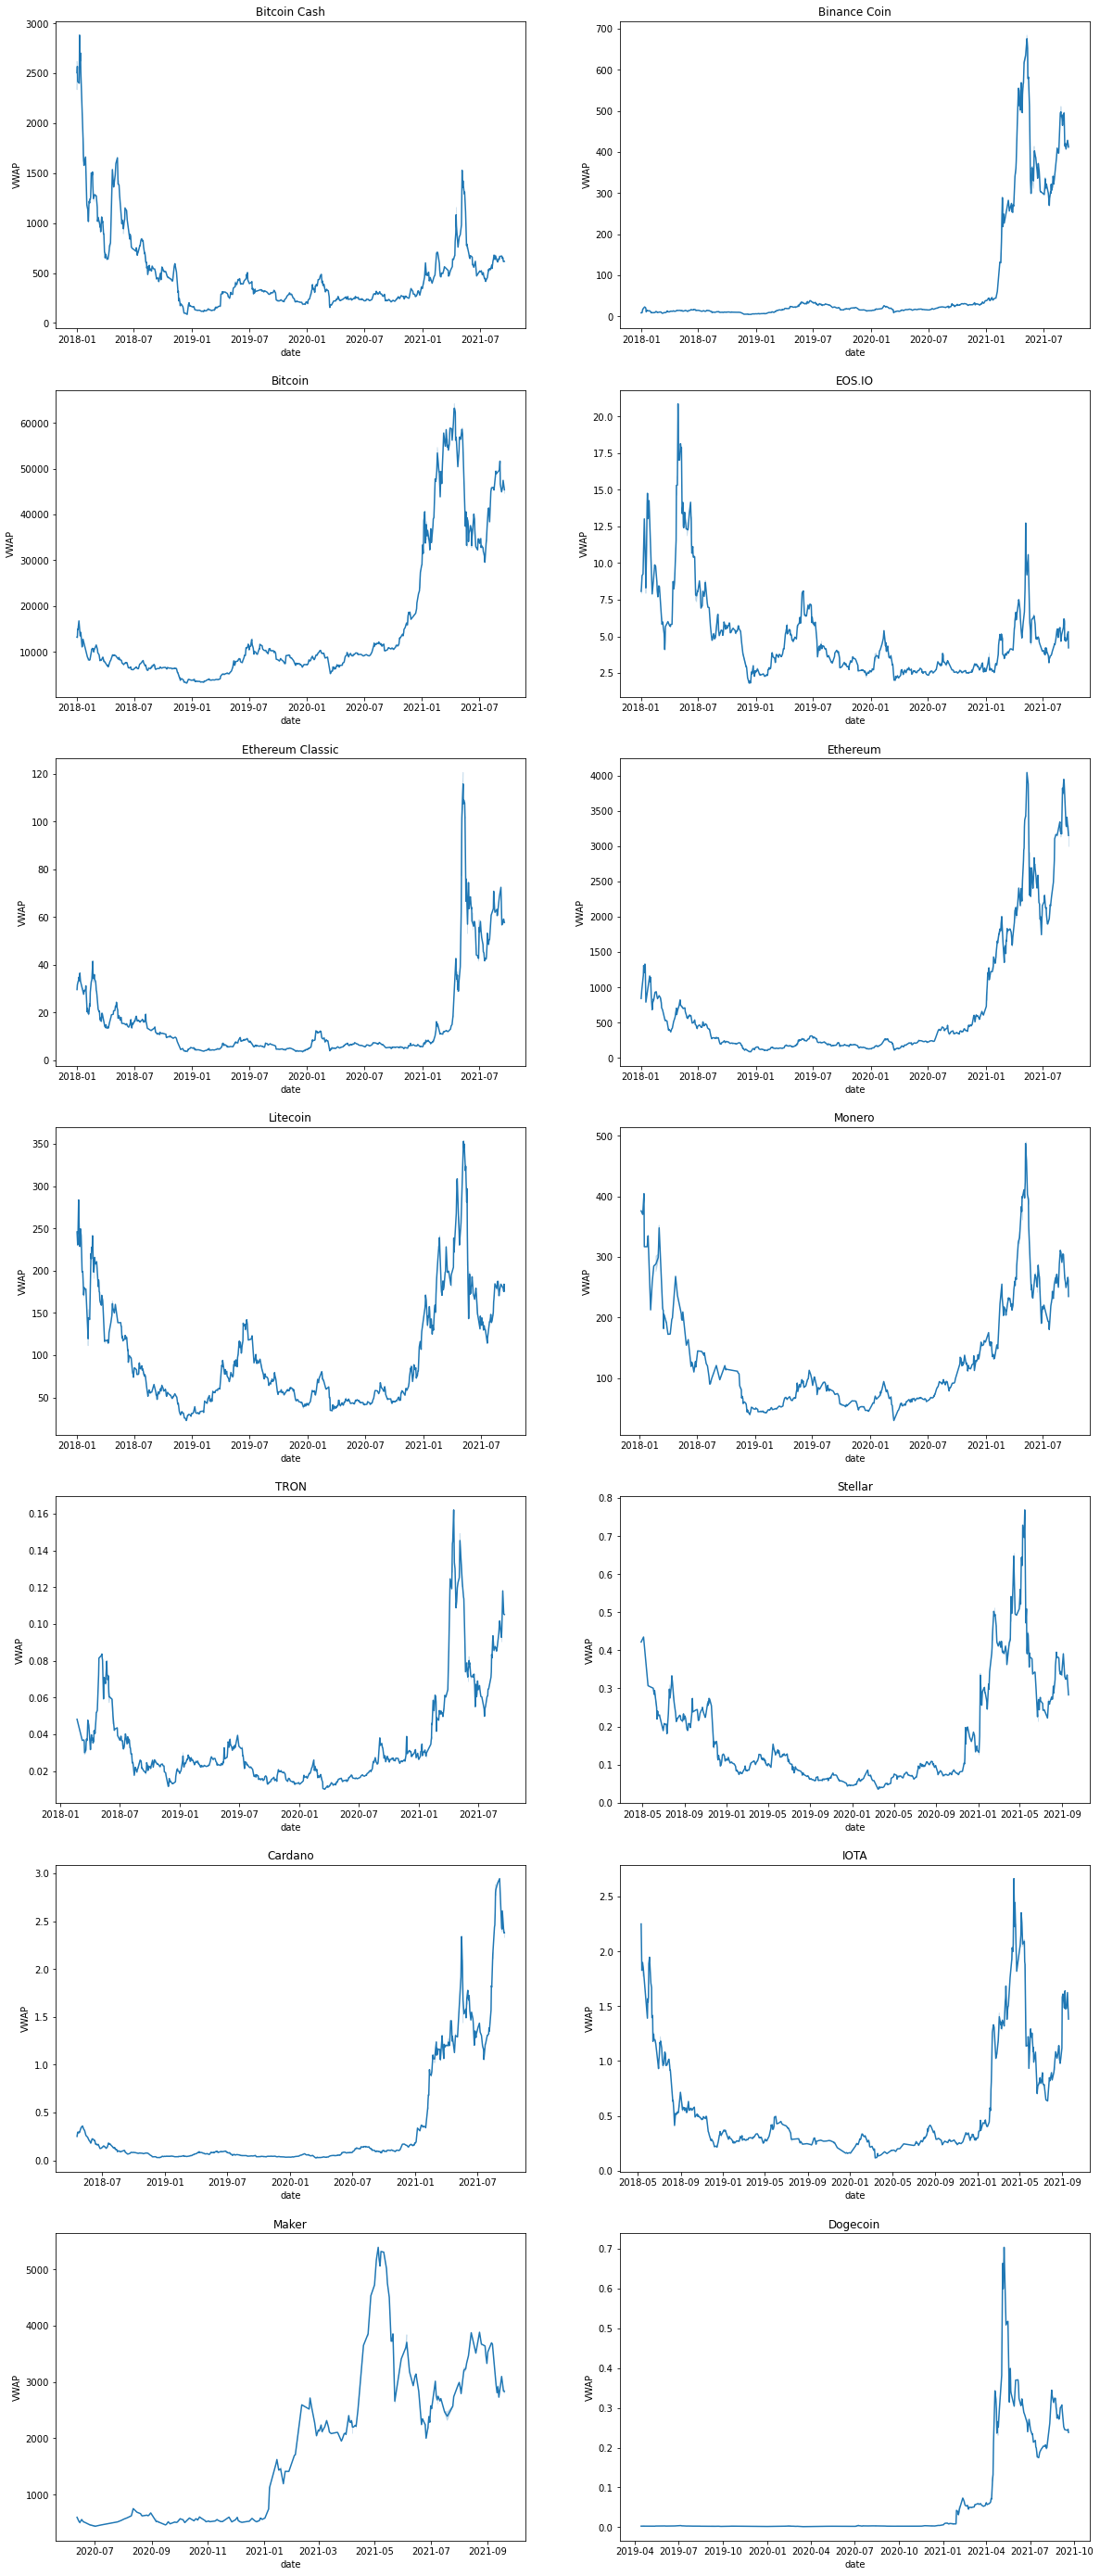

In [19]:
fig, axes = plt.subplots(7, 2, figsize=(20, 50))
for i,asset in enumerate(assets['Asset_Name']):
    df_crypt = dtrain_sample[dtrain_sample['Asset_Name'] == asset]
    sns.lineplot(x="date", y="VWAP", data=df_crypt, ax=axes[int(i/2),i%2])
    axes[int(i/2),i%2].set_title(asset) 

In [20]:
print("Available data period")
for i,asset in enumerate(assets['Asset_Name']):
    df_crypt = dtrain[dtrain['Asset_Name'] == asset]
    print( "{} to {} ------> {}".format(df_crypt.sort_values(by=['timestamp'])['date'].iloc[0], df_crypt.sort_values(by=['timestamp'])['date'].iloc[-1], asset ))


Available data period
2018-01-01 to 2021-09-20 ------> Bitcoin Cash
2018-01-01 to 2021-09-20 ------> Binance Coin
2018-01-01 to 2021-09-20 ------> Bitcoin
2018-01-01 to 2021-09-20 ------> EOS.IO
2018-01-01 to 2021-09-20 ------> Ethereum Classic
2018-01-01 to 2021-09-20 ------> Ethereum
2018-01-01 to 2021-09-20 ------> Litecoin
2018-01-01 to 2021-09-20 ------> Monero
2018-02-06 to 2021-09-20 ------> TRON
2018-02-17 to 2021-09-20 ------> Stellar
2018-04-17 to 2021-09-20 ------> Cardano
2018-05-09 to 2021-09-20 ------> IOTA
2018-08-15 to 2021-09-20 ------> Maker
2019-04-12 to 2021-09-20 ------> Dogecoin
